## The data in the table is believed to obey a model of the form $y_i = mx_i +b+e_i$ where $e_i$ is a gaussian error term. 

### For the first two measurements the error is known and indicated in the table. For the last three measurements the error is not known, but assumed to have constant variance. 


| x   | y        |
|-----|----------|
| 0   |0.0434±0.1    |
| 1   |1.0343±0.1    |
| 2   |-0.2588±$\sigma$|
| 3   |3.68622±$\sigma$|
| 4   |4.3188±$\sigma$|

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0,1,2,3,4])
y = np.array([0.0434, 1.0343, -0.2588, 3.68622, 4.3188])
known_error = np.array([0.1, 0.1])

Text(0.5, 1.0, 'Data from question 2')

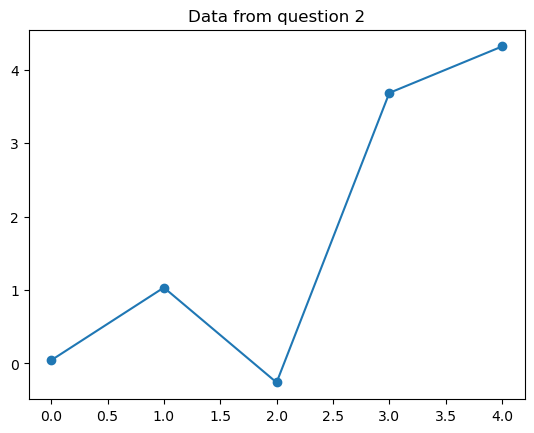

In [3]:
plt.scatter(x,y)
plt.plot(x,y)
plt.title('Data from question 2')

### Let's set up our design matrix and solve this using projections as we have been

The design matrix A, is a matrix with five rows and two columns one column containing x values and one column of one's. 

Beta vector is a vector containing m and b

### After taking the log of the posterior probability function and taking the derivative with respect to $\vec{\beta}$ at $\hat{\beta}$ and setting equal to zero as we have in previous problems. We get that $\hat{\beta} = (\matrix{A^T}\cdot\matrix{A})^{-1} A^{T} \cdot \vec{y}$

In [4]:
#define design matrix
A = np.vstack((x, np.ones(len(x)))).T

AAinverse = np.linalg.inv(A.T @ A)

#compute Atranspose times y vector
At_y = A.T @ y 

beta_hat = AAinverse @ At_y

m = beta_hat[0]
b = beta_hat[1]

print("the slope is:",beta_hat[0], "the y-intercept is",beta_hat[1])

the slope is: 1.120272 the y-intercept is -0.47575999999999974


## Notice doing linear regression by hand gives us the same result

In [5]:
def estimate_coef(x,y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    
    b1 = SS_xy/SS_xx
    b0 = m_y - b1*m_x
    
    return(b0, b1)

coeff = estimate_coef(x,y)
print("the slope is:",coeff[1], "the y-intercept is",coeff[0])

the slope is: 1.120272 the y-intercept is -0.47575999999999974


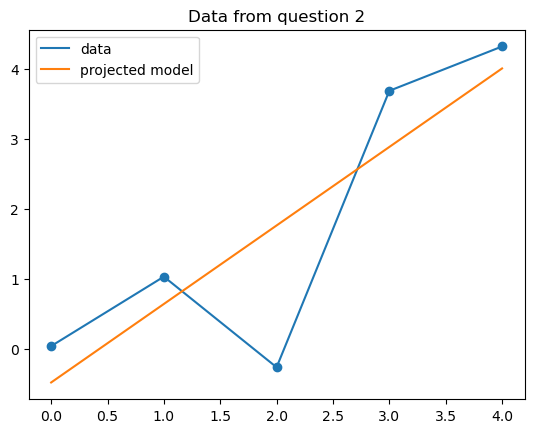

In [6]:
plt.scatter(x,y)
plt.plot(x,y, label='data')
plt.plot(x, m*x + b, label='projected model')
plt.title('Data from question 2')
plt.legend()

### To find the error of our estimates we have to find the diagonal elements of the square root of this matrix $\sigma^2 (A^TA)^{-1}$

https://genomicsclass.github.io/book/pages/standard_errors.html

We find sigma squared by summing the residuals squared. 

In [7]:
#projected values for y
y_hat = A @ beta_hat

#reshape y
y = y.reshape(-1, 1)

#compute residuals 
residuals = y - y_hat

#sum of squared residuals
SS = np.sum(residuals**2)

N = 5
k = 2
nu = 3

sigma_hat_squared = SS/nu

#compute standard errors of parameters 

SE_beta_hat = np.sqrt(np.diag(sigma_hat_squared * np.linalg.inv(A.T @ A)))

#compute the test values

print("standard error of slope is:", SE_beta_hat[0], "standard error of y-intercept is", SE_beta_hat[1])

standard error of slope is: 2.2493209910607836 standard error of y-intercept is 5.509688695830282


## error bars for particular values

In [19]:
N = 5
k = 2
mu = N-k

A_2 = np.array([2, 1])
x_2 = 2
y_2 = y_hat[2]

A_3 = np.array([3,1])
x_3 = 3
y_3 = y_hat[3]

A_4 = np.array([4,1])
x_4 = 4
y_4 = y_hat[4]


s_squared = (np.transpose(y-A @ beta_hat) @ (y-A @ beta_hat))/nu

AtA = A.T @ A

H = s_squared * AtA

cov = np.linalg.inv(H)

In [23]:
#variance predictions for x(2), x(3), x(4)

var_pred_2 = A_2 @ cov @ A_2.T
std_pred_2 = np.sqrt(var_pred_2)

var_pred_3 = A_3 @ cov @ A_3.T
std_pred_3 = np.sqrt(var_pred_3)

var_pred_4 = A_4 @ cov @ A_4.T
std_pred_4 = np.sqrt(var_pred_4)

In [26]:
print("The standard deviations for the last three data points are:", std_pred_2, std_pred_3, std_pred_4, "for y2, y3, and y4 respectively")

The standard deviations for the last three data points are: 0.33785318387880064 0.4137839542388806 0.585178879976993 for y2, y3, and y4 respectively
